In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_FR = df[df['job_country'] == 'France']

In [3]:
df_skills = df_FR.explode('job_skills')

In [ ]:
df_skills_count = df_skills.groupby(['job_skills','job_title_short']).size()

df_skills_count = df_skills_count.reset_index(name='skill_count')

df_skills_count.sort_values(by = 'skill_count', ascending=False, inplace=True)


In [ ]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])



In [ ]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)[::-1]
    sns.barplot(data=df_plot, x='skill_count', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 7000) # make the scales the same

fig.suptitle('Counts of Skills Requested in France Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5) # fix the overlap
plt.show()

In [21]:
df_job_title_count = df_FR['job_title_short'].value_counts().reset_index(name='job_total')

In [19]:
df_skills_count

,job_skills,job_title_short,skill_count
944,python,Data Scientist,6320
1211,sql,Data Analyst,6213
943,python,Data Engineer,6188
1212,sql,Data Engineer,5319
942,python,Data Analyst,4506
...,...,...,...
289,drupal,Cloud Engineer,1
1163,solidity,Senior Data Engineer,1
1162,solidity,Data Scientist,1
309,electron,Business Analyst,1


In [26]:
df_skills_perc = pd.merge(df_skills_count,df_job_title_count,how='left',on = 'job_title_short')
df_skills_perc['skill_percent'] = (df_skills_perc['skill_count'] / df_skills_perc['job_total']) * 100

df_skills_perc


,job_skills,job_title_short,skill_count,job_total,skill_percent
0,python,Data Scientist,6320,9497,66.547331
1,sql,Data Analyst,6213,13803,45.011954
2,python,Data Engineer,6188,10936,56.583760
3,sql,Data Engineer,5319,10936,48.637527
4,python,Data Analyst,4506,13803,32.645077
...,...,...,...,...,...
1469,drupal,Cloud Engineer,1,338,0.295858
1470,solidity,Senior Data Engineer,1,1186,0.084317
1471,solidity,Data Scientist,1,9497,0.010530
1472,electron,Business Analyst,1,738,0.135501


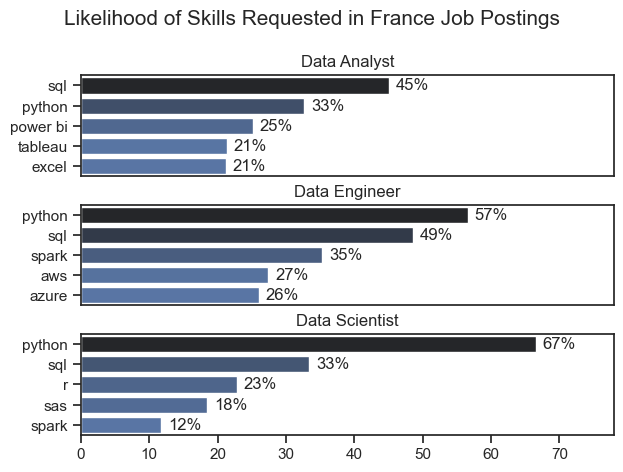

In [33]:
fig, ax = plt.subplots(len(job_titles), 1)


for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 78)

    for n,v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1,n,f'{v:.0f}%', va='center')
    
    if i !=len(job_titles) - 1:
        ax[i].set_xticks([])


fig.suptitle('Likelihood of Skills Requested in France Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5) # fix the overlap
plt.show()